In [1]:
%matplotlib inline
import os
import matplotlib
#matplotlib.use('TkAgg')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
import warnings
import matplotlib.cbook

import shutil

In [2]:
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)
# Create a random seed and set it to 0
np.random.seed(42)

# Make random clusters using blobs
X, y = make_blobs(n_samples=5000, centers=[[2, 1], [-4, -2], [1, -4], [0, 3]], cluster_std=0.7)

# Scatter plot the data to check
plt.scatter(X[:, 0], X[:, 1], marker='.', edgecolors='white')
plt.show()

""" 
Set K-Means Clustering, 
n_clusters is number of clusters to form, 
k-means++ for smart way to converge faster
n_init initializes different centroids each run and best output is shown in terms of inertia
"""

In [3]:
X = np.load('feature_vector.npy')
file_full_path = np.load('data_imgs.npy')
X.shape

(7926, 100352)

In [ ]:
wcss =[]
for i in range (1,150) :
    k_means = KMeans(n_clusters = i, init = 'k-means++', max_iter =300,
                     n_init = 10, n_jobs = -1 ,random_state = 42)
    # Fit KMeans model with feature matrix, X
    k_means.fit(X)
    wcss.append(k_means.inertia_)



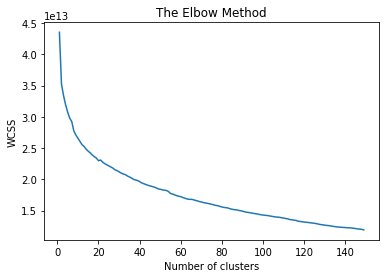

In [8]:
# Plot the graph to visualize the Elbow Method to find the optimal number of cluster  
plt.plot(range(1,150
              ),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
n_clusters = 120
cluster_data = 'cluster_output_kmeans'
for i in range(n_clusters) :
    path = os.path.join(cluster_data,str(i))    
    if not os.path.exists(path) :
        os.makedirs(path)

In [17]:
k_means = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter =300,
                n_init = 10, n_jobs = -1 ,random_state = 42)
# Fit KMeans model with feature matrix, X
k_means.fit(X)
# Grab the labels for each point in the model
k_means_labels = k_means.labels_

idx = 0
for label in np.nditer(k_means_labels):
    #print("File : {} , Label : {} ".format(file_full_path[idx],label))    
    shutil.copy(file_full_path[idx],os.path.join(cluster_data,str(label)))
    idx += 1

In [ ]:
# Get the coordinates of the cluster centers
k_means_cluster_centers = k_means.cluster_centers_
print(k_means_cluster_centers)

# Visualize the Plot
# Initialize plot with the specified dimensions.
fig = plt.figure(figsize=(8, 5))

# Colors uses a color map, which will produce an array of colors based on the number of labels there are.
colors = plt.get_cmap('Spectral')(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot with a black background for better visibility
ax = fig.add_subplot(1, 1, 1, facecolor='black')

In [15]:
set(k_means.labels_)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59}